# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# LOADING THE DATASET

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# DATA CLEANING AND PREPROCESSING

In [3]:
df = data.copy()
df.drop(columns=['CustomerId','RowNumber','Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
overview = pd.concat((df.isnull().sum(),df.nunique(),df.dtypes), axis=1, keys=['Null count','cardinality','Data Type'])
display(overview.T)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Null count,0,0,0,0,0,0,0,0,0,0,0
cardinality,460,3,2,70,11,6382,4,2,2,9999,2
Data Type,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64


# LABEL ENCODING

In [5]:
gender_labels = {'Female':0, 'Male':1}
geography_labels = {'France':0, 'Germany':1, 'Spain':2}
df.Gender = df.Gender.map(gender_labels)
df.Geography = df.Geography.map(geography_labels)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# CHECKING FOR IMBALANCES

['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']


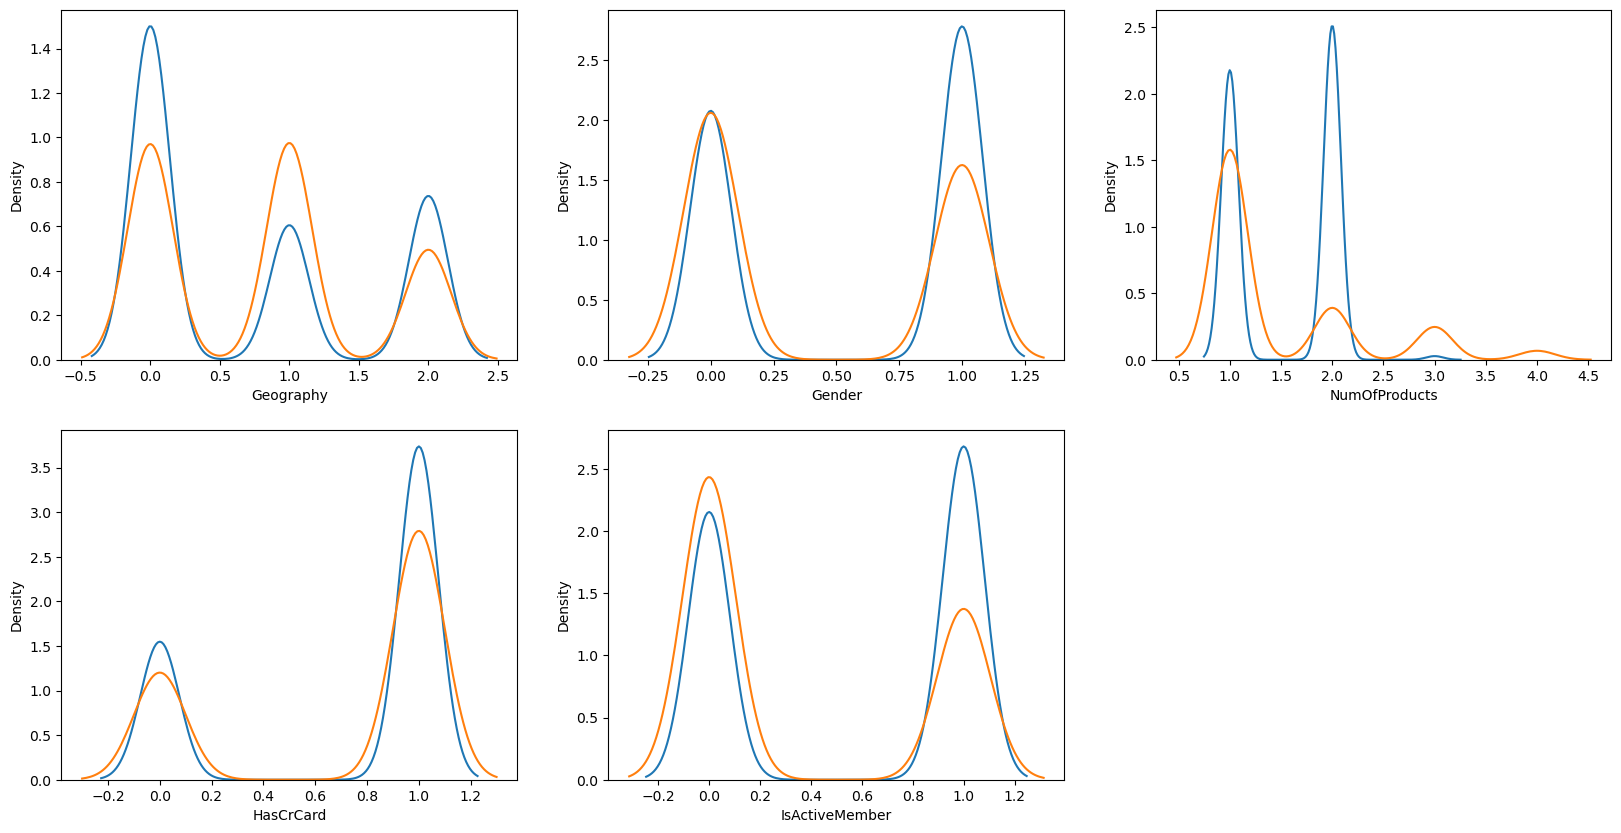

In [6]:
cat = df.columns[df.nunique()<10].tolist()
cat.pop()
print(cat)
plt.figure(figsize=(20,10))
i=1
for factor in cat:
    plt.subplot(2,3,i)
    sns.distplot(df[factor].loc[df['Exited']==0], hist=False)
    sns.distplot(df[factor].loc[df['Exited']==1], hist=False)
    i+=1

# DATA VISUALIZATION

In [7]:
color_1 = sns.color_palette("Accent",10)
color_2 = sns.color_palette("mako_r",10)
color_3 = sns.color_palette("Spectral_r",10)
color_4 = sns.color_palette()

0    7963
1    2037
Name: Exited, dtype: int64


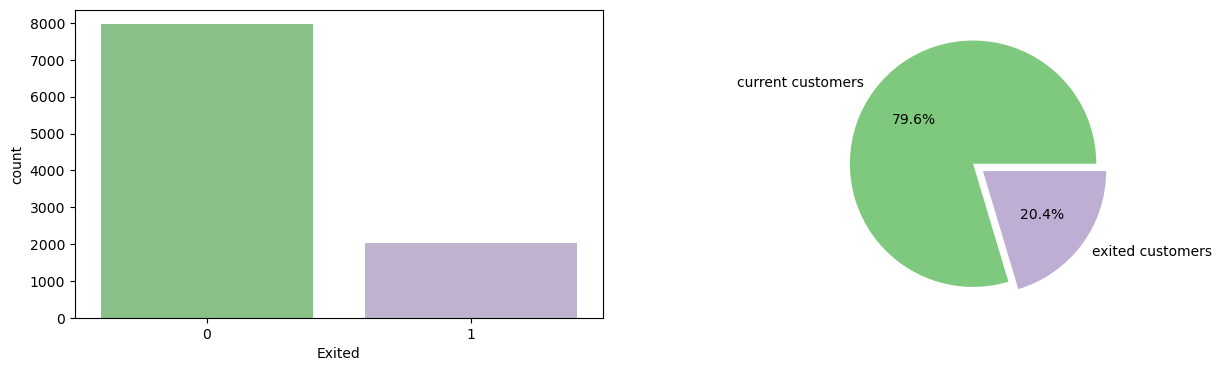

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=df["Exited"],palette=color_1)

plt.subplot(1,2,2)
plt.pie(df["Exited"].value_counts(),explode=[0.0,0.1],labels=["current customers","exited customers"],
        colors=color_1,autopct="%.01f%%")
print(df["Exited"].value_counts())

Exited  NumOfProducts
0       2                4242
        1                3675
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: NumOfProducts, dtype: int64
------------------------------
Exited  HasCrCard
0       1            5631
        0            2332
1       1            1424
        0             613
Name: HasCrCard, dtype: int64
------------------------------
Exited  IsActiveMember
0       1                 4416
        0                 3547
1       0                 1302
        1                  735
Name: IsActiveMember, dtype: int64


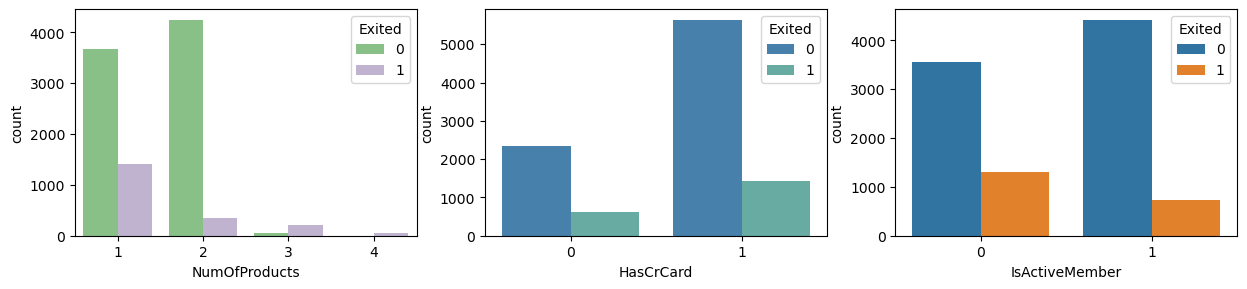

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(data=df,x="NumOfProducts",hue="Exited",palette=color_1)
plt.subplot(3,3,2)
sns.countplot(data=df,x="HasCrCard",hue="Exited",palette=color_3)
plt.subplot(3,3,3)
sns.countplot(data=df,x="IsActiveMember",hue="Exited",palette=color_4)


print(df.NumOfProducts.groupby(df.Exited).value_counts())
print("--"*15)
print(df.HasCrCard.groupby(df.Exited).value_counts())
print("--"*15)
print(df.IsActiveMember.groupby(df.Exited).value_counts())

# TRAINING AND TESTING THE MODEL

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Exited']).values, df.Exited.values, 
                                                    test_size=0.2, random_state=42)

In [11]:
#USING CLASSIFIER - GRIDSEARCHCV

In [12]:
def result_grid(x_train, y_train, x_test, y_test):
    model_param_grid={
        'Logistic Regression':(LogisticRegression(max_iter=10000),{'C': [0.01, 0.1, 1, 10.0],
                                                                   'solver': ['liblinear','lbfgs','newton-cg']}),
        'KNN':(KNeighborsClassifier(),{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]}),
#         'Naive Bayes':(MultinomialNB(),{'alpha': [0.1, 1.0, 10.0], 'fit_prior': [True,False]}),
#         'SVM':(LinearSVC(max_iter=10000),{'C': [0.01, 0.1, 1.0, 10.0]}),
        'Decision Tree':(DecisionTreeClassifier(max_depth=10),{'criterion': ['gini','entropy'], 'splitter':['best','random'],
                                                  'max_depth':[10,50,100,150,200,250,300,350,400]}),
        'Random Forest':(RandomForestClassifier(),{'n_estimators':[50,100,150,200]})
    }
    
    results=[]
    
    for name, (model,parameters) in model_param_grid.items():
        grid=GridSearchCV(model,parameters)
        
        print(f"Tuning for {name}")
        
        st=time.time()
        
        grid.fit(x_train,y_train) # fitting in GridSearchCV
        y_pred=grid.predict(x_test) # predicts using best hyperparameters
        acc=accuracy_score(y_test,y_pred) # best accuracy obtained
        
        en=time.time()
        
        net_time=en-st
        
        # printing best parameters:
        print(f"Best hyperparameters for {name}: {grid.best_params_}")
        print(f"Best obtined score for {name}: {grid.best_score_*100:.3f}%")
        print(f"Running time for {name}:{net_time:.3f}s")
                
        results.append([name,grid.best_params_,grid.best_score_*100,net_time])
        print('-'*100)
        print()
    
    result_df=pd.DataFrame(results, columns=['model_name','best_parameters','best_test_score','running_time'])
    result_df=result_df.style.highlight_max(subset=['best_test_score'], color = 'lightgreen')
    result_df=result_df.highlight_min(subset=['best_test_score'], color = 'pink')
    result_df=result_df.highlight_max(subset=['running_time'], color = 'pink')
    result_df=result_df.highlight_min(subset=['running_time'], color = 'lightgreen')
    return result_df

In [13]:
res = result_grid(x_train, y_train, x_test, y_test)
res

Tuning for Logistic Regression
Best hyperparameters for Logistic Regression: {'C': 10.0, 'solver': 'newton-cg'}
Best obtined score for Logistic Regression: 80.625%
Running time for Logistic Regression:15.862s
----------------------------------------------------------------------------------------------------

Tuning for KNN
Best hyperparameters for KNN: {'n_neighbors': 31}
Best obtined score for KNN: 79.450%
Running time for KNN:5.024s
----------------------------------------------------------------------------------------------------

Tuning for Decision Tree
Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}
Best obtined score for Decision Tree: 84.500%
Running time for Decision Tree:3.794s
----------------------------------------------------------------------------------------------------

Tuning for Random Forest
Best hyperparameters for Random Forest: {'n_estimators': 150}
Best obtined score for Random Forest: 86.175%
Running ti

,model_name,best_parameters,best_test_score,running_time
0,Logistic Regression,"{'C': 10.0, 'solver': 'newton-cg'}",80.625000,15.862320
1,KNN,{'n_neighbors': 31},79.450000,5.024029
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}",84.500000,3.794361
3,Random Forest,{'n_estimators': 150},86.175000,24.118227


In [14]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=model.fit_transform(data[i])
        
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
from sklearn.model_selection import train_test_split
x=data.drop("Exited",axis=1)
y=data['Exited']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)
from sklearn.preprocessing import StandardScaler

model=StandardScaler()

x_train=pd.DataFrame(model.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(model.fit_transform(x_test),columns=x_test.columns)

In [17]:
x_train.shape

(7000, 13)

In [18]:
y_train.shape

(7000,)

In [19]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train, y_train)


classifier_rf.score(x_test,y_test)

0.8456666666666667

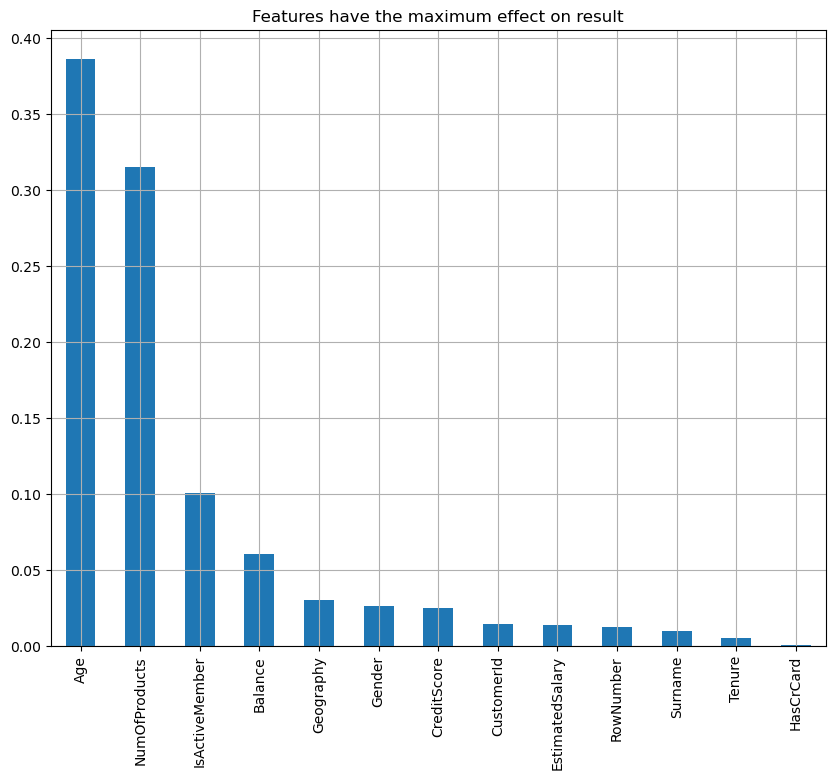

In [21]:
feature_importances = pd.Series(classifier_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
# Plot a simple bar chart
feature_importances.plot.bar();
plt.grid()
plt.title("Features have the maximum effect on result")
plt.show()

In [22]:
imp_feature_data=data[['Age','NumOfProducts','IsActiveMember']]
x1_train,x1_test,y1_train,y1_test=train_test_split(imp_feature_data,data['Exited'],random_state=1,test_size=0.3)
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x1_train, y1_train)


classifier_rf.score(x1_test,y1_test)

0.855

In [23]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'n_estimators':np.arange(2,10),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,5),
         'min_samples_leaf':np.arange(1,5),
         'min_samples_split':np.arange(1,5),
         'max_features':['auto'],
         'random_state':[10]}

rf_model=RandomForestClassifier()

rf_hyper_model1=GridSearchCV(rf_model,param_grid=params)

rf_hyper_model1.fit(x1_train,y1_train)

rf_hyper_model1.score(x1_test,y1_test)

0.8563333333333333

In [24]:
params = {'n_estimators':np.arange(2,10),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,5),
         'min_samples_leaf':np.arange(1,5),
         'min_samples_split':np.arange(1,5),
         'max_features':['auto'],
         'random_state':[10]}

rf_model=RandomForestClassifier()

rf_hyper_model=GridSearchCV(rf_model,param_grid=params)

rf_hyper_model.fit(x_train,y_train)

y_pred = rf_hyper_model.predict(x_test)

rf_hyper_model.score(x_test,y_test)

0.8373333333333334

In [25]:
rf_hyper_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4]),
                         'max_features': ['auto'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([1, 2, 3, 4]),
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [10]})

In [26]:
y_pred = rf_hyper_model.predict(x_test)
rf_hyper_model.score(x_test,y_test)

0.8373333333333334

In [27]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [29]:
# Model Accuracy
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))# Model Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7966666666666666
Accuracy: 0.7966666666666666


In [30]:
# K NEIGHBOURS CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

neigh.score(x_test,y_test)

0.8093333333333333

In [31]:
y_pred = neigh.predict(x_test)
neigh.score(x_test,y_test)

0.8093333333333333